# Linear Models for Machine Learning

[Click here](https://neuronjolt.com/data/downloads/ch_11_linear_models.ipynb) to download this chapter as a Jupyter (.ipynb) file.

There are many different algorithms that can be used within supervised machine learning models. So far we have covered the K-nearest neighbors method in detail, and seen logistic regression used in examples. In this chapter we take a closer look at four different linear models that may be used in machine learning models: ***ols regression***, ***ridge regression***, ***lasso regression***, and ***logistic regression***. OLS regression, ridge regression, and lasso regression, are used for regression tasks. Logistic regression, on the other hand, is used for classification tasks. 

These models are all categorized as linear models because they base their predictions on a weighted sum of the feature values for a particular instance. The weights on the features, along with a constant called the intercept that is added to the weighted sum, are called the ***coefficients*** of the model. When each of these algorithms is fit to data it finds the coefficients that optimize some function, called the algorithm's ***objective function***. When we covered OLS regression from the statistics perspective earlier in the book we learned that its objective function is the sum of squared errors. When an OLS regression model is fit to data it finds the coefficients that minimize the sum of squared errors. 

We have learned that the K-nearest neighbors algorithm has a parameter $k$, which represents the number of nearest neighbors on which the prediction is based, that serves as a parameter that can be manipulated to affect the flexibility of a K-nearest neighbors model to fit the training data. OLS regression lacks a similar parameter. We will see that the only way to make an OLS regression model more flexible to fit the training data is to add new features derived from the original features, such as polynomial features and interaction terms (products of the original features). The other linear models we will cover, ridge regression, lasso regression, and logistic regression, all have a penalty based on the magnitude of the coefficients added to their objective functions. Adding a penalty of this type to a linear algorithm is called ***regularization***, and ridge regression, lasso regression and logistic regression are referred to as ***regularized linear models***. Adding a penalty on the magnitude of the coefficients to the objective function puts pressure on the coefficients to have smaller magnitudes, which makes the model less flexible to fit the training data. So, the flexibility of these models to fit the training data can be manipulated by adjusting the strength of the regularization (penalty on the magnitude of the coefficients), and each has a parameter that may be used to do so.

## Module and Function Imports

In [1]:
import mglearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_validate

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

**Set an option to prevent scientific notation when numbers are displayed***

In [2]:
# Set print options to suppress scientific notation
np.set_printoptions(suppress=True, precision=4)

## Fundamentals of Linear Models for Regression

In the broad scheme of supervised machine learning, models are things that relate an input variable or a set of input variables ("features") to an outcome variable ("target"). ***Linear models*** are models that make predictions of the target based on a linear function of the input features that takes the form of a weighted sum of the input features plus a constant called the intercept. With linear models for regression, the weighted sum of the input features plus the intercept calculates a value that is used as the model's prediction for the target variable.

The general prediction formula is the following, where $x_0$ to $x_p$ are the features, $w_0$ to $w_p$ are the weights on the features and $b$ is the intercept:

$$\hat{y} = w_0 * x_0 + w_1 * x_1 + \ldots + w_p * x_p + b$$

Together, the weights on the features and the intercept are called the ***coefficients*** of the model. The predictions form a *line* if the model is based on one feature, a *plane* if there are two features, and a *hyperplane* for 3 or more features. 

There are several different linear models for regression. The difference between them lies in how the model coefficients (the weights $w$ and the intercept $b$) are learned from the data and how model flexibility can be controlled. In the sections below we will cover OLS linear regression, ridge regression, and lasso regression.

## Ordinary Least Squares (OLS) Linear Regression

OLS regression is the simple, classic method for linear regression. The weights and intercept are chosen to minimize the sum of squared errors of the predictions on the training data. OLS regression has no parameters that may be set to different values to control the flexibility of the model, but the flexibility of the model to fit the training data can be increased by adding derivative features such as interaction terms and polynomial functions of the original features.

* **interaction terms** - New features that are calculated as the products of existing features. For example, in a model that predicts $y$ from features $a$ and $b$, the interaction term would be $ab$
* **polynomial features** - For example, in a model that predicts $y$ from features $a$ and $b$, the polynomial terms to the second degree would be $a^2$ and $b^2$.  

### Create Data

Let's create some data that we can use to investigate OLS regression. We will create 60 rows of data with one feature and one target so that we can visualize the regression model.

In [3]:
rng = np.random.default_rng(seed = 75)

In [4]:
X = rng.random(size = (60, 1)) * 10 
y = X**2 + rng.normal(size = (60, 1)) * 9 

### Split the Data into Training and Test Data

Next we split the data into training data and test data. We will 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 102)

### Fit an OLS Linear Regression Model to the Training Data

In the code cell below we use the `LinearRegression()` constructor to instantiate an OLS linear regression model and fit it to the training data. The fitted model is assigned to the variable `lr`.

In [6]:
# Create a LinearRegression object and fit it to the training data
lr = LinearRegression().fit(X_train, y_train)

### Plot the Regression Line and the Training Data

Below is a plot if the training data and the regression line that resulted from fitting the linear regression model to the training data. 

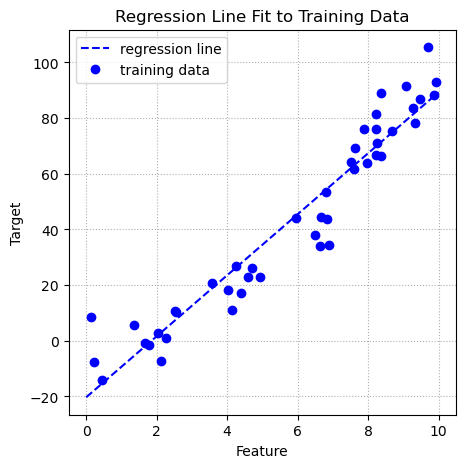

In [7]:
# Plot the regression line over the training data
line = np.linspace(0, 10, 50).reshape(-1, 1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Regression Line Fit to Training Data")
ax.plot(line, lr.predict(line), c = 'blue', linestyle = '--')
ax.plot(X_train, y_train, 'o', c = 'blue')
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
ax.legend(["regression line", "training data"], loc="best")
ax.grid(linestyle = ':');

### The Regression Equation

The blue dashed line represents the predictions produced by the regression equation. When there is only one predictor variable the regression equation is the equation of a line. The OLS regression finds the coefficients that minimize the sum of squared errors. When there is only one feature the coefficients include the weight on the feature and the intercept.
    
The fitted OLS regression object `lr` has properties that we can use to access the coefficients and the intercept. The `coef_` property accesses the coefficient(s) and the `intercept_` method accesses the intercept.

In [8]:
lr.coef_

array([[10.9586]])

In [9]:
lr.intercept_

array([-20.2971])

We can use these coefficients to build the regression equation. The regression equation for the OLS regression we just fit to the data is:

$\hat{y} = 10.96x - 20.30$
    
We could use this equation to produce the predictions of the model. These predictions match those produced by the fitted linear regression object's `predict()` method.

### Making Predictions

We can make predictions by using the LinearRegression object's `predict()` method, or we can use the coefficients (`coef_`) and intercept (`intercept_`) to manually do the predictions from scratch with a linear function constructed from the weight (coefficient) and the intercept. First, we use the fitted linear regression object's `predict()` method to make predictions for the test data:

In [10]:
lr.predict(X_test)

array([[-10.3118],
       [ 87.5328],
       [ 59.3211],
       [ 38.6036],
       [ 88.8616],
       [ 64.8095],
       [ 72.1145],
       [ -0.9606],
       [ 26.651 ],
       [ -5.0631],
       [ -3.5164],
       [ 18.0702],
       [-18.9566],
       [ 84.9167],
       [ 30.3259]])

Next, we make the predictions on the test data from scratch, using the coefficient and intercept to build the regression equation:

In [11]:
(lr.intercept_ + lr.coef_ * X_test)

array([[-10.3118],
       [ 87.5328],
       [ 59.3211],
       [ 38.6036],
       [ 88.8616],
       [ 64.8095],
       [ 72.1145],
       [ -0.9606],
       [ 26.651 ],
       [ -5.0631],
       [ -3.5164],
       [ 18.0702],
       [-18.9566],
       [ 84.9167],
       [ 30.3259]])

### Evaluating Performance

We can evaluate the predictions with the fitted linear regression object's `score()` method. This method produces the predictions, then compares them to the actual target values and produces an $R^2$ value as the default performance metric.

In [12]:
lr.score(X_test, y_test)

0.8926723721845352

### Explanation of the Calculation of $R^2$

The default metric for the `score()` method of regression models in scikit-learn is $R^2$, also known as the ***coefficient of determination***. Conceptually, $R^2$ is the proportion of variance in the target variable that can be explained by the regression model. $R^2$ is defined as $1 - \frac{u}{v}$, where $u$ is the ***sum of squared errors*** $\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2$, i.e. the sum of squared distances between the actual target values and the predicted target values, and $v$ is the ***total sum of squares*** $\sum_{i=1}^{n}(y_{i} - \bar{y})^2$, i.e. the sum of squared distances between the actual target values and the mean target value, where $\hat{y}_i$ is the $i^{th}$ predicted target value and $\bar{y}$ is the average target value.

Below we calculate $R^2$ manually, to compare the result to what we get from the `score()` method. You will see that they produce the same value.

In [13]:
# Generate the predictions
predictions = lr.predict(X_test)

# Calculate the mean of the target variable
mean_y = np.mean(y_test)

# Calculate the sum of squared errors
sse = np.sum((y_test - predictions)**2)

# Calculate the total sum of squared
sst = np.sum((y_test - mean_y)**2)

# Calculate R-squared (also called the coefficient of determination)
coef_of_det = 1 - sse/sst

coef_of_det

0.8926723721845352

### Add the Test Data to the Regression Plot

When we plotted the regression equation line in the plot earlier in the chapter we only showed the training data and the regression line. In a machine learning context the goal of fitting a regression model to some training data is so that we can produce a model that can be used to make predictions for new data. Our test data represents new data. We add the test data to the plot below as red dots. You can see that the regression equation line provides reasonably accurate predictions for the test data. As we saw above, the $R^2$ value for the test data is $0.8927$.

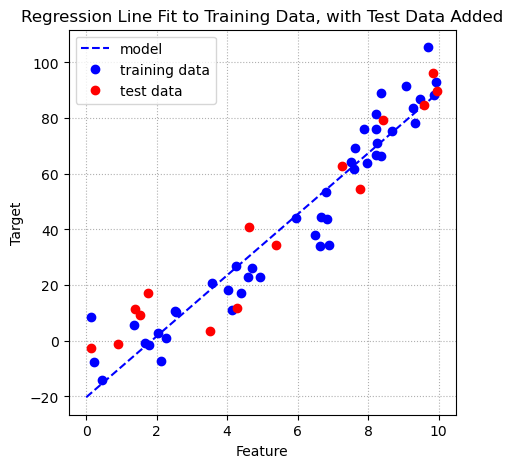

In [14]:
# Add the test data to the plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Regression Line Fit to Training Data, with Test Data Added")
ax.plot(line, lr.predict(line), c = 'blue', linestyle = '--')
ax.plot(X_train, y_train, 'o', c = 'blue')
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
ax.legend(["regression model", "training data"], loc="best")

# Add the test data
ax.plot(X_test, y_test, 'o', c = 'red')
ax.legend(["model", "training data", "test data"], loc="best")
ax.grid(linestyle = ':');

### Estimate Generalization Performance for OLS Linear Regression on This Data

So far we have built the regression model and evaluated its performance on only one train-test split. To obtain a more robust estimate of a model's generalization performance we should build and test the model across multiple train-test splits. This process is called ***cross validation***. We can perform cross validation using scikit-learn's `cross_validate()` function. It fits and tests a model over several different splits, defined by the `cv` parameter. The `cv` parameter defaults to 5-fold cross validation, but we can set it to an integer for a different number of folds, or to a splitter object for other types of cross validation, such as repeated K-fold cross validation, repeated stratified K-fold cross validation, or shuffle split cross validation. `cross_validate()` keeps track of the scores on the test fold for each of the splits. It will also keep track of the scores on the training folds if the `return_train_score` parameter is set to `True`. The `cross_validate()` function returns a dictionary, so it is easy to convert the results to a pandas DataFrame.  

Below we use the `cross_validate()` function to run an 10-fold cross validation on our data, using OLS linear regression. The data will be divided into 10 parts, called *folds*, and each fold takes a turn as the test data, after building the model on the other 9 folds.

In [15]:
results = cross_validate(estimator = LinearRegression(),
                         X = X,
                         y = y,
                         cv = 10,
                         return_train_score = True)

If we view the `test_score` in the `results` dictionary we can see that there are 10 test scores, one for each fold.

In [16]:
results['test_score']

array([0.8439, 0.8619, 0.9436, 0.8988, 0.9492, 0.8712, 0.907 , 0.8739,
       0.7652, 0.9348])

The mean score on the test folds from a cross validation is an excellent estimate of generalization performance. We also examine the standard deviation of the test fold scores to get an idea how consistent the model's performance is.

In [17]:
print(f'Mean train r-squared: {np.mean(results["train_score"])}')
print(f'Mean test r-squared: {np.mean(results["test_score"])}')

Mean train r-squared: 0.915909256167847
Mean test r-squared: 0.8849644149614363


We estimate the model's generalization performance to be an $R^2$ of approximately 0.885.

## Making Regression Models More Flexible by Adding Derived Features

The estimated generalization performance of the OLS regression model on our data reflects how well a straight line fits the data. It is possible that a straight line is not flexible enough to capture the pattern in the data. Indeed, when we look at the plot it looks like there might be a bit of curve to the data.

One common method used to make linear models more flexible is to add interaction terms (calculated by multiplying the values of two features) and polynomial terms (powers of the original features). In this section we will add polynomial terms and then examine the plot of the regression equation to see how the line of fit becomes more flexible after the polynomial terms are added. We will also estimate generalization performance for the models with the polynomial features added to see if the added flexibility leads to better performance.

We can use scikit-learn's `PolynomialFeatures` class to add the polynomial terms. An instance of the PolynomialFeatures class is a transformer, just like a min-max scaler or one-hot encoder. Note that since there is only one feature in the data we are using there are no interactions to be added. 

### Create Transformers of the `PolynomialFeatures` Class

In the code cell below we create objects of the `PolynomialFeatures` class. The `degree` parameter specifies which polynomial terms to add. The degree is the highest-level polynomial term to be added, so `degree = 6` specifies that to the original feature $x$ we add $x^2$, $x^3$, $x^4$, $x^5$, and $x^6$.

In [18]:
# Create some PolynomialFeatures objects
poly_2 = PolynomialFeatures(degree = 2, include_bias = False)
poly_6 = PolynomialFeatures(degree = 6, include_bias = False)

### Add Polynomial Features

Next, we use the `PolynomialFeatures` objects we created to transform the features.

In [19]:
# Use the PolynomialFeatures objects to transform X
X_2 = poly_2.fit_transform(X)
X_6 = poly_6.fit_transform(X)

### Fit Regression Models to the Data with the Added Polynomial Terms

We will split the transformed data first and then fit the regressions to the training data. We can then produce plots of the training data, regression line, and test data similar to the plot we created earlier in the chapter.

In [20]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, random_state = 102)

lr_2 = LinearRegression().fit(X_train_2, y_train_2)

In [21]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y, random_state = 102)

lr_6 = LinearRegression().fit(X_train_6, y_train_6)

### Plot of Regression with Polynomial Features to Second Degree

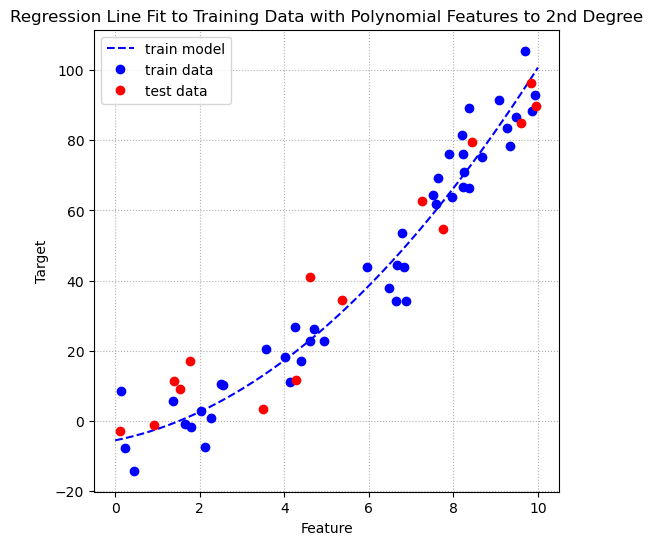

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Regression Line Fit to Training Data with Polynomial Features to 2nd Degree")
ax.plot(line, lr_2.predict(poly_2.fit_transform(line)), c = 'blue', linestyle = '--')
ax.plot(X_train_2[:,0], y_train_2, 'o', c = 'blue')
ax.plot(X_test_2[:,0], y_test_2, 'o', c = 'red')
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
ax.legend(["regression model", "training data"], loc="best")
ax.legend(["train model", "train data", "test data"], loc="best")
ax.grid(linestyle = ':')

At first glance it appears that the line of fit after adding polynomial terms to the second degree is a better fit line, because it seems to have captured the slight curve in the data. To confirm this first impression we can use cross validation to estimate the generalization performance of OLS regression on the data after adding the polynomial terms to the second degree.

Below we estimate the generalization performance of a linear regression model with the second-degree polynomial features data `X_2`.

In [23]:
results_2 = cross_validate(estimator = LinearRegression(),
                           X = X_2,
                           y = y,
                           return_train_score = True,
                           cv = 10)

# print mean performance metric for train and test
print(f'Mean train r-squared: {np.mean(results_2["train_score"])}')
print(f'Mean test r-squared: {np.mean(results_2["test_score"])}')

Mean train r-squared: 0.9475268425680021
Mean test r-squared: 0.9180684901461935


For comparison purposes, below are the results from the cross validation with just the original feature in the data.

In [24]:
print(f'Mean train r-squared: {np.mean(results["train_score"])}')
print(f'Mean test r-squared: {np.mean(results["test_score"])}')

Mean train r-squared: 0.915909256167847
Mean test r-squared: 0.8849644149614363


We can see a familiar pattern: We increased the flexibility of the model, and this caused both training performance and test performance to increase. This suggests that the original model was underfitting. It used only the original feature and thus could only create a straight line of fit. This straight line had decent fit, but couldn't capture the slight curve in the data. Adding the second-degree polynomial term gave the regression more flexibility to create a curved line of fit. This resulted in better performance.

Next, let's see what happens if we add polymomial terms up to the 6th degree.

### Plot of Regresssion with Polynomial Features to the 6th Degree

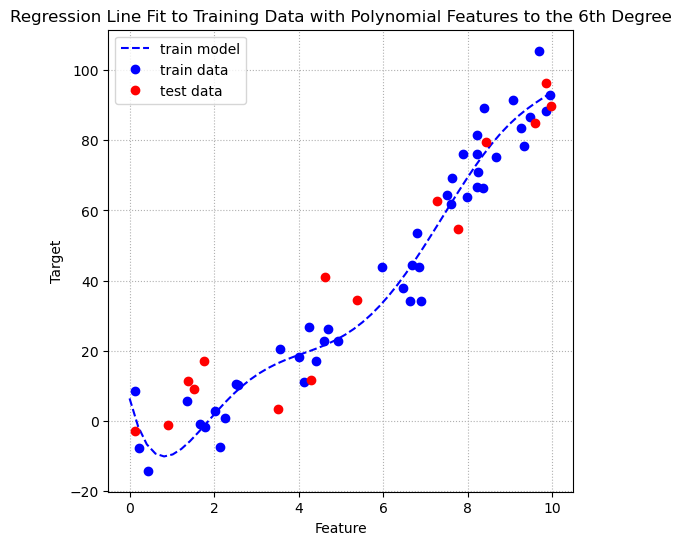

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Regression Line Fit to Training Data with Polynomial Features to the 6th Degree")
ax.plot(line, lr_6.predict(poly_6.fit_transform(line)), c = 'blue', linestyle = '--')
ax.plot(X_train_6[:,0], y_train_6, 'o', c = 'blue')
ax.plot(X_test_6[:,0], y_test_6, 'o', c = 'red')
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
ax.legend(["regression model", "training data"], loc="best")
ax.legend(["train model", "train data", "test data"], loc="best")
ax.grid(linestyle = ':')

We can see that the line of fit how has the flexibility to curve in different directions and fit the training data very well. It looks like this may hurt performnce on the test data. Let's perform another cross validation to see what happens to the training and test performance after adding polynomial terms to the 6th degree. 

In [26]:
results_6 = cross_validate(estimator = LinearRegression(),
                           X = X_6,
                           y = y,
                           return_train_score = True,
                           cv = 10)

# print mean performance metric for train and test
print(f'Mean train r-squared: {np.mean(results_6["train_score"])}')
print(f'Mean test r-squared: {np.mean(results_6["test_score"])}')

Mean train r-squared: 0.9522222223598418
Mean test r-squared: 0.9065182288884891


The additional flexibility from adding the higher-order polynomial terms made training performance even better, but caused mean performance on the test folds, our best estimate of generalization performance, to decrease. This suggests that the model is overfitting the training data when polynomial terms to the 6th degree are introduced to the model.  

These examples illustrate that adding derived features such as polynomial terms makes linear models more flexible to fit the training data. As with other models, too little flexibility to fit the training data can lead to underfitting, but too much flexibility can lead to overfitting. Unfortunately, adding derived features such as polynomial terms is a one-way street; we can only add flexibility to the model. Adding derived features also only permits adding flexibility in fairly large increments. Let's take a look at OLS regression's performance on some real data to investigate the implications of those observations.

## OLS Regression with the California Housing Data

Let's try OLS linear regression on the California Housing data. We will first first remove the features that represent latitude and longitude. Then, we will estimate generalization performance for an OLS linear regression model on the data with the original features, and then on the data with polynomial terms and interaction terms added.

First, we fetch the dataset. 

In [27]:
ca = fetch_california_housing()
X = pd.DataFrame(ca.data, columns = ca.feature_names).drop(columns = ['Latitude', 'Longitude'])
y = ca.target

Next, we use nested cross validation to estimate the generalization performance of an OLS linear regression model on the data. Note that it is recommended to use standard scaling to preprocess the data before linear regression, so we will need to set up a pipeline. We don't need a column transformer here because all the columns in the data are numeric, so all will be transformed with a `StandardScaler` object. A column transformer is used when different columns require differnt preprocessing. We will use 10-fold cross validation and display the means of the scores on the training folds and the test folds.

In [28]:
pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('model', LinearRegression())
])

results_ca = cross_validate(estimator = pipe,
                            X = X,
                            y = y,
                            cv = 10,
                            return_train_score = True)

In [29]:
print(f"Mean train r2: {np.mean(results_ca['train_score'])}")
print(f"Mean test r2: {np.mean(results_ca['test_score'])}")

Mean train r2: 0.5397372138635308
Mean test r2: 0.4219269283730321


We will now add flexibility to the model by adding polynomial features to the second degree. This will add all possible products of the original features and the squares of the original features. We can do so by adding a `PolynomialFeatures()` transformer to our pipeline.

After adding the polynomial features transformation to the pipeline we will run another 10-fold cross validation to estimate the generalization performance of linear regression on the California Housing data after adding polynomial features to degree 2.

In [30]:
pipe_ca_pf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaling', StandardScaler()),
    ('model', LinearRegression())
])

results_ca_pf = cross_validate(estimator = pipe_ca_pf,
                               X = X,
                               y = y,
                               cv = 10,
                               return_train_score = True)

In [31]:
print(f"Mean train r2 w/pf: {np.mean(results_ca_pf['train_score'])}")
print(f"Mean test r2 w/pf: {np.mean(results_ca_pf['test_score'])}")

Mean train r2 w/pf: 0.6039481339333074
Mean test r2 w/pf: -1.9840024387170534


Wow! The added flexibility has improved performance on the training folds, with an increase in $R^2$ from around $0.540$ to around $0.604$. The estimate of generalization performance, however, has decreased to an $R^2$ of around $-1.98$! A negative $R^2$ is terrible. It means that the model performs worse than just predicting the mean of the target variable for every row! What we are seeing here is that the added flexibility from adding the interactions and polynomial features has caused the OLS regression model to overfit the training data. When your data has a large number of features it is common for OLS linear regression models to overfit the training data, especially when some of the features are interaction or polynomial terms. Moreover, OLS linear regression doesn't have a parameter that we can manipulate to limit the model's flexibility to fit the training data.

Let's take a look at two other types of linear regression that were developed to overcome this limitation of standard OLS linear regression. These forms of linear regression, called ***ridge*** and ***lasso*** DO have parameters that we can set to control model flexibility and thus overfitting. Restricting a linear model's flexibility in order to prevent overfitting is called ***regularization***. So, ridge and lassor are referred to as ***regularized linear regression models***.

## Regularized Linear Regression Models

## Ridge regression

Like OLS regression, ridge regression also determines the weights and intercept for the linear model using ordinary least squares optimization (finding the coefficients that minimize the sum of squared errors), but another constraint is added to try to keep the magnitude of the weights (coefficients other than the intercept) as small as possible. More precisely, a constant times the sum of squares of the weights is added to the objective function as a penalty. So, the objective function now minimizes the sum of squared errors plus some constant times the sum of squares of the weights. This is called ***L2-Norm regularization*** or just ***L2 regularization***.  

In scikit-learn we use the `Ridge()` function to instantiate ridge regression models. It has a parameter, `alpha`, that varies the flexibility of the model. The higher `alpha` is the more regularization is applied and the less flexible the model is. Ridge regression with `alpha` set near 0 has a very low level of regularization applied and is very similar to OLS regression. Note that the `Ridge()` function sets `alpha` to 1.0 by default. 

We have seen that standard OLS linear regression performs very poorly on the California Housing data with the second-degree polynomial features. Let's try ridge regression on that data to see if the regularization helps its performance. We will first run a grid search to find the best range for the `alpha` parameter, and then run a nested cross validation to estimate Ridge regression's generalization performance on this data. The `alpha` parameter is typically varied on a logarithmic scale. We will use the `np.logspace()` function to generate a specified number of parameter values on a log scale, evenly-spaced in log space.

Before running the ridge model we need to do some pre-processing. Since regularized regression models like ridge put a penalty on the sum of the squares of the weights (coefficients), feature scale influences the penalty function. So, we typically standardize the features so that the regularization penalty is applied consistently across all features.

We will standardize the features with scikit-learn's `StandardScaler()`, which converts features to z-scores (distances from the mean of the feature, expressed in terms of standard deviations of the feature).

In [32]:
pipe_ridge = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaling', StandardScaler()),
    ('ridge', Ridge())
])

# Specify the parameters to be tested in each step of the pipeline
# Naming convention for the key is:
# step name, two underscores, then parameter name
pgrid_ridge = {'ridge__alpha': np.logspace(-1, 6, 20)}

# Define a grid search using the defined pipe, parameter grid, and 10-fold cross validation
gs_ridge = GridSearchCV(estimator = pipe_ridge, 
                        param_grid = pgrid_ridge, 
                        cv = 5, 
                        return_train_score = True)

gs_ridge.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([      0.1   ,       0.2336,       0.5456,       1.2743,
             2.9764,       6.9519,      16.2378,      37.9269,
            88.5867,     206.9138,     483.293 ,    1128.8379,
          2636.6509,    6158.4821,   14384.4989,   33598.1829,
         78475.997 ,  183298.0711,  428133.2399, 1000000.    ])},
             return_train_score=True)

Let's check the best parameter setting from the grid search to make sure we are using an appropriate range for the parameter in the grid search. Our range includes alpha values from $10^{-1}$ to $10^6$.

In [33]:
print("Best parameters: {}".format(gs_ridge.best_params_))

Best parameters: {'ridge__alpha': 6158.482110660255}


The best parameter setting identified by the grid search is within the range of parameter value candidates we specified, so we can now move on to the nested cross validation to estimate generalization performance. Before we do so, however, let's make a validation curve plot to investigate the relationship between the alpha parameter, which controls the model's flexibility to fit the training data, and mean performance on the training and test folds.

In [34]:
# convert grid search results to a DataFrame
results = pd.DataFrame(gs_ridge.cv_results_)

#### A few things to note in the plot code below:

* The x-axis is put on a logarithmic scale with `plt.xscale('log')`
* `plt.axvline()` and `plt.axhline()` are used to place dotted lines intersecting the point of best test performance
* The x-axis is flipped so that model flexibility increases from left to right

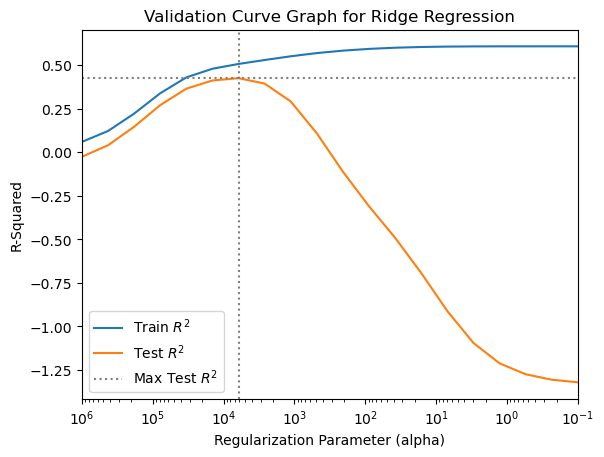

In [35]:
# Create the validation curve graph
plt.plot(results['param_ridge__alpha'], results['mean_train_score'])
plt.plot(results['param_ridge__alpha'], results['mean_test_score'])
plt.xlim(max(results['param_ridge__alpha']), min(results['param_ridge__alpha']))
plt.axhline(y = max(results['mean_test_score']),
           color = 'gray',
           linestyle = ':')
plt.axvline(x = results['param_ridge__alpha'][results['mean_test_score'].idxmax()],
           color = 'gray',
           linestyle = ':')
plt.title("Validation Curve Graph for Ridge Regression")
plt.xscale('log')
plt.xlabel("Regularization Parameter (alpha)")
plt.ylabel("R-Squared")
plt.legend(["Train $R^2$", "Test $R^2$", "Max Test $R^2$"], 
           loc="best");

We see that the best value of the `alpha` parameter is between $10^3$ and $10^5$.

We now estimate generalization performance for the ridge regression model on the California Housing data with added polynomial features by running a nested cross validation. To help the nested cross validation run more quickly we will focus the range of alpha parameters within a smaller range, use fewer candidates for alpha, and use 5-fold cross validation.

In [36]:
pgrid_ridge = {'ridge__alpha': np.logspace(3, 5, 8)}

gs_ridge = GridSearchCV(estimator = pipe_ridge, 
                        param_grid = pgrid_ridge, 
                        cv = 5, 
                        return_train_score = True)

results_ridge = cross_validate(estimator = gs_ridge,
                               X = X,
                               y = y,
                               cv = 5)

In [37]:
results_ridge['test_score'].mean()

0.43591426870325767

In [38]:
results_ridge['test_score'].std()

0.02208990461142988

We added flexibility to the model by adding polynomial features, and then used regularization to control the flexibility. The estimated generalization performance of the ridge regression model on the California Housing data with second-degree polynomial features is much better than the performance of OLS linear regression on the same data and slightly better than the performance of OLS linear regression on the data with just the original features.

Regularization applies a penalty to the magnitudes of the weights. So, when more regularization is applied by using a higher `alpha` parameter value with ridge regression we should see the weights get smaller. This is demonstrated by the plot below.

### Effect of the `alpha` Parameter on Coefficient Magnitude for Ridge Models

To demonstrate how L2 regularization reduces the magnitudes of the coefficients, below we fit an OLS regression and ridge regressions with varying levels of regularization to the California Housing data with polynomial features added. Then we plot the magnitudes of the coefficients. You can see that as regularization strength increases the coefficients get smaller, which reduces the flexibility of the model to fit the training data.

In [39]:
# Transform features
poly_scale = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scale', StandardScaler())
])

X_s = poly_scale.fit_transform(X)

# Fit Ridge models with varying levels of regularization
# to the transformed features
ridge100 = Ridge(alpha = 100).fit(X_s, y)
ridge1k = Ridge(alpha = 1_000).fit(X_s, y)
ridge10k = Ridge(alpha = 10_000).fit(X_s, y)

# Fit an OLS Linear Regression to the transformed features
lr = LinearRegression().fit(X_s, y)

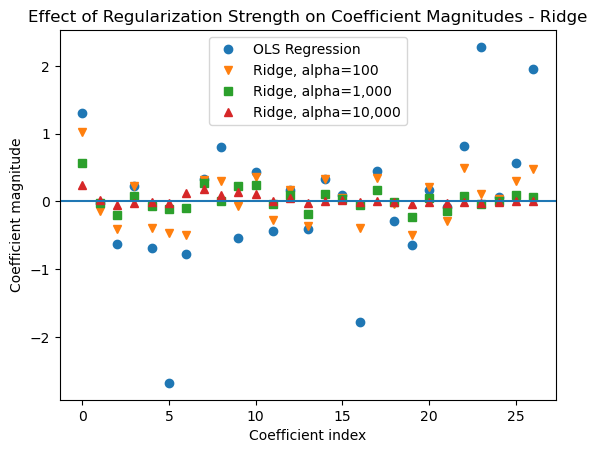

In [40]:
plt.plot(lr.coef_, 'o', label="OLS Regression")
plt.plot(ridge100.coef_, 'v', label="Ridge, alpha=100")
plt.plot(ridge1k.coef_, 's', label="Ridge, alpha=1,000")
plt.plot(ridge10k.coef_, '^', label="Ridge, alpha=10,000")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.legend(loc = 'best')
plt.title('Effect of Regularization Strength on Coefficient Magnitudes - Ridge');

## Lasso Regression

Lasso, like ridge, is a form of OLS regression that has regularization added. Lasso uses ***L1 regularization***, which adds a different penalty to the objective function. With L1 regularization the penalty is a constant times the sum of the *absolute values* of the coefficients rather than the *squares* of the coefficients. This typically forces some of the coefficients to zero, thus removing some of the features from the model. This is a form of ***automatic feature selection*** and can make the model simpler and easier to interpret. The parameter that controls flexibility with lasso is called `alpha`, just like it is for ridge regression. Increasing `alpha` increases the amount of regularization that is applied, reducing flexibility. As with ridge regression, the default value of `alpha` set by the `Lasso()` function is 1.0.

Let's run a grid search to determine the best range for the `alpha` parameter and then run a nested cross validation to estimate generalization performance for Lasso regression on the California Housing data with second-degree polynomial features.

In [41]:
pipe_lasso = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
    ('scaling', StandardScaler()),
    ('lasso', Lasso(max_iter = 10_000))
])

# Specify the parameters to be tested in each step of the pipeline
# Naming convention is step name, two underscores, then parameter name
pgrid_lasso = {'lasso__alpha': np.logspace(-2, 3, 30)}

# Define a grid search using the defined pipe, parameter grid, and 10-fold cv
gs_lasso = GridSearchCV(estimator = pipe_lasso, 
                        param_grid = pgrid_lasso, 
                        cv = 5, 
                        return_train_score = True)

gs_lasso.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaling', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([   0.01  ,    0.0149,    0.0221,    0.0329,    0.0489,    0.0728,
          0.1083,    0.161 ,    0.2395,    0.3562,    0.5298,    0.788 ,
          1.1721,    1.7433,    2.5929,    3.8566,    5.7362,    8.5317,
         12.6896,   18.8739,   28.0722,   41.7532,   62.1017,   92.3671,
        137.3824,  204.336 ,  303.9195,  452.0354,  672.3358, 1000.    ])},
             return_train_score=True)

In [42]:
gs_lasso.best_params_

{'lasso__alpha': 0.014873521072935119}

The best parameter value for alpha is between $10^{-2}$ and $10^{-1}$. For the nested cross validation we will focus on a narrower range of alpha values, reduce the number of alpha candidate values, and use 5-fold cross validation.

In [43]:
pgrid_lasso_2 = {'lasso__alpha': np.logspace(-2, 1, 14)}

gs_lasso_2 = GridSearchCV(estimator = pipe_lasso, 
                          param_grid = pgrid_lasso_2, 
                          cv = 5)

results_lasso = cross_validate(estimator = gs_lasso_2,
                               X = X,
                               y = y,
                               cv = 5)

In [44]:
results_lasso['test_score'].mean()

0.47342168899842196

In [45]:
results_lasso['test_score'].std()

0.046787175366813566

Lasso performs even better than ridge on the California Housing data with polynomial features added. This is presumably because lasso, with its automatic feature selection, has removed some of the features from the model.

Let's make another coefficient magnitude plot to see the effect of various levels of `alpha` on the coefficient magnitudes for the lasso model.

In [46]:
# Transform features with the ct_rr column transformer
X_s = poly_scale.fit_transform(X)

# Fit Lasso models with varying levels of regularization
# to the transformed features
lasso1 = Lasso(alpha = 0.1, max_iter = 5_000).fit(X_s, y)
lasso01 = Lasso(alpha = 0.01, max_iter = 5_000).fit(X_s, y)
lasso001 = Lasso(alpha = 0.001, max_iter = 5_000).fit(X_s, y)

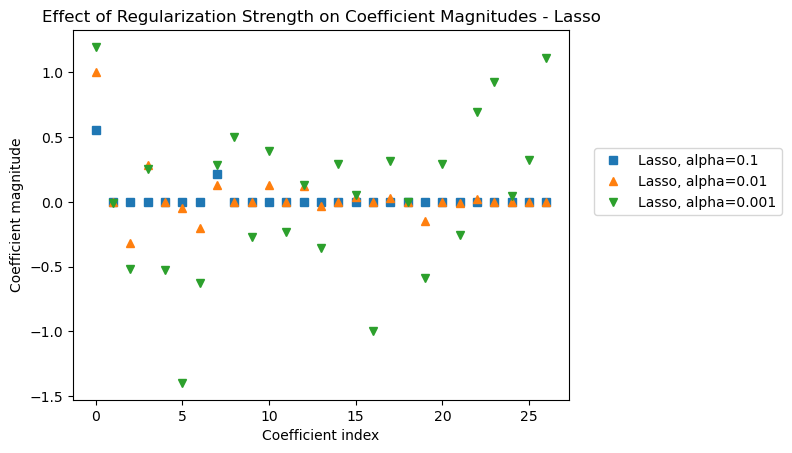

In [47]:
plt.plot(lasso1.coef_, 's', label="Lasso, alpha=0.1")
plt.plot(lasso01.coef_, '^', label="Lasso, alpha=0.01")
plt.plot(lasso001.coef_, 'v', label="Lasso, alpha=0.001")
plt.legend(ncol=1, loc=(1.05, 0.5))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.title("Effect of Regularization Strength on Coefficient Magnitudes - Lasso");

## Logistic Regression, A Linear Model for Classification

Logistic regression is a linear model that may be used to model the relationship between a set of features and a binary target variable (a target variable that is categorical and that can take two values). 

We have learned about linear models for regression, including  OLS regression, ridge, and lasso, which are used to predict a numeric quantity. With those models the prediction is simply the number calculated from the regression equation (intercept plus the sum of the products of the features and their weights). When we want to predict a binary class, however, we cannot use OLS regression, ridge, or lasso. Instead, we use logistic regression. The logistic regression equation also produces a number. So, a question you might be asking yourself is how the number calculated by the logistic regression equation can be used to produce a binary class prediction.

In a logistic regression model the number calculated by the regression equation is interpreted as the natural log of the odds that the target variable has the positive class. If the probability of an event is $p$, the odds of the event is $\frac{p}{1-p}$ and the natural log of the odds of the event is: 
$$\ln\left(\frac{p}{1-p}\right)$$
So, the logistic regression equation can be expressed as:
$$\ln\left(\frac{p}{1-p}\right) = w_{0}*x_{0} + w_{1}*x_{1} + ... + w_{p}*x_{p} + b$$

This is called the "logit form" of the logistic regression equation, because another name for the $\ln(\frac{p}{1-p})$ function is the "logit" function.

In this equation $b$ is the intercept and the $w$ terms are the weights on the $x$ variables. So, why is the number produced by the logistic regression equated to the natural logarithm of the odds that the target variable is the positive class (an arbitrary designation given to one of the two possible target classes) and not simply to the probability that the target variable is of the positive class? The reason is because the logit function can form reasonably linear relationships with the $x$ variables, resulting in residuals that are normally distributed.

Another reason is that the number produced by the logistic regression equation can be any real number. In logistic regression those real numbers are converted to a number between 0 and 1 that can be interpreted as a probability estimate that the observation belongs to the positive class. The function that does the conversion is the logistic function, also called the sigmoid function or the logistic sigmoid function. This function maps any real number to a number between 0 and 1. The logistic function is defined as $$\sigma(z) = \frac{1}{1 + e^{-z}}$$ where $e$ is a constant and $z$ is the real number produced by the regression equation. 

The logistic function is plotted below. Note how it maps real number inputs on the x-axis to a number between 0 and 1 on the y-axis.

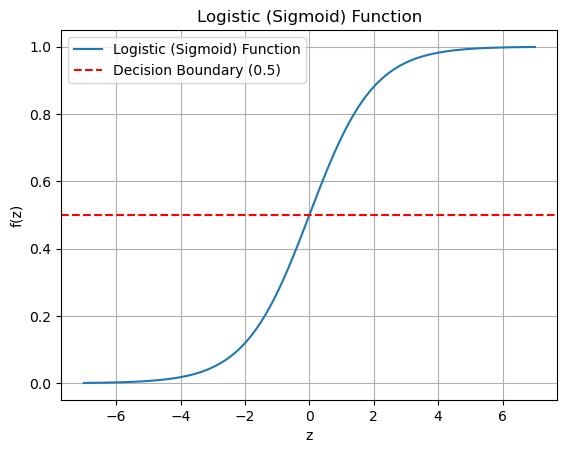

In [48]:
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z_values = np.linspace(-7, 7, 200)

# Calculate corresponding values for the logistic function
logistic_values = logistic_function(z_values)

# Plot the logistic function
plt.plot(z_values, logistic_values, label='Logistic (Sigmoid) Function')
plt.title('Logistic (Sigmoid) Function')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.grid(True)
plt.show()

Another way to express the logistic regression equation, called the "logistic form" because it uses the logistic sigmoid function, directly models the probability of the positive class:

$$p = \frac{1}{1 + e^{-(w_{0}*x_{0} + w_{1}*x_{1} + ... + w_{p}*x_{p} + b)}}$$

The important thing for users of logistic regression is that we can easily transform the number calculated by the logit form of the logistic regression equation into a probability. We first get the odds by taking the exponential of the logit (the logit is the number produced by the logistic regression equation):
$$odds = e^{\ln\left(\frac{p}{1-p}\right)}$$
Then, to calculate the probability of the positive class, we can divide the odds by 1 plus the odds: $$p = \frac{odds}{1+odds}$$

We can also just use the logistic sigmoid function directly to calculate the probability from the number produced by the logistic regression equation.

### The Objective Function for Logistic Regression

Recall that OLS linear regression finds the coefficients that result in the lowest sum of squared errors. The objective function for logistic regression works differently. The objective function for logistic regression causes it to find the values for the coefficients that result in the predicted probabilities matching the observed data as closely as possible. Here’s how it works. For each observation, the probability of the actual outcome is calculated. The probability of the positive class is the result of applying the logistic sigmoid function to the number produced by the logistic regression equation. The probability of the negative class is 1 - the probability of the positive class. 

After calculating the probability of the observed outcome for each instance the probabilities are multiplied together to calculate the overall likelihood of the observed data under the current model. For convenience, we often use the log-likelihood (the natural log of the likelihood), which turns multiplication into addition and makes calculations easier. Logistic regression finds the coefficients that result in the maximum log-likelihood. This means finding the coefficients that make the observed data as probable as possible under the model. This is done using an optimization algorithm, typically gradient ascent (or gradient descent if we minimize the negative log-likelihood), which iteratively adjusts the parameters to increase the likelihood of the observed outcomes. In essence, the optimization function in logistic regression adjusts the coefficients to make the model’s predictions as consistent as possible with the actual observed outcomes. This is achieved by maximizing the log-likelihood. This type of optimization is called ***maximum likelihood***.


### Regularization for Logistic Regression

When used for machine learning logistic regression is typically regularized. This means that a penalty on the magnitude of the coefficients is added to the optimization function. This penalty controls the flexibility of the model to fit the training data. 

In scikit-learn logistic regression is regularized by default. The parameter that controls flexibility of the model to fit the training data is `C`. The strength of the regularization is inversely proportional to `C`. So, higher values of `C` correspond to *less* regularization and more model flexibility to fit the training data. By default, logistic regression applies L2 regularization, similar to ridge regression, where a penalty is applied to the objective function based on a constant multiplied by the sum of squared coefficients. You can cause it to use L1 regularization by setting the `penalty = 'l1'` parameter. When you do so you will also need to set `solver = 'liblinear'` because the default solver may only be used with L2 regularization. The default value for `C` is 1.0 and it should be varied on a logarithmic scale.

The general prediction formula for the logistic regression model is the following, where $x_0$ to $x_p$ are the features, $w_0$ to $w_p$ are the weights on the features, and $b$ is the intercept:
$$\hat{y} = w_0 * x_0 + w_1 * x_1 + \ldots + w_p * x_p + b > 0$$

The general prediction formula for logistic regression predicts whether the observation is of the positive class (True) or not (False). If the value of the logistic regression equation is greater than 0 the prediction is True (i.e. the observation is a member of the positive class). We use the logistic function to translate the result of the logistic regression equation into a number between 0 and 1. This can be interpreted as the probability of belonging to the positive class. The logistic function applied to 0 results in a value of 0.50. So, if the logistic regression equation yields a number greater than 0 the estimated probability of the observation belonging to the positive class is greater than 0.50, so we predict that observation to be a member of the positive class.

The prediction relies on the threshold 0.50. It is worth noting here that since the probabilities derived from the logistic regression equation are only estimated probabilities, we sometimes adjust this threshold and observe its effect on model performance. For example, we might decide to classify an observation as a member of the positive class if the logistic regression equation yields an estimated probability of membership in the positive class of 0.40 or greater, or 0.60 or greater.

## Model Building with Logistic Regression

We will investigate logistic regression by estimating its generalization performance on the breast cancer data and then tuning the model to find the best setting for the parameter `C`, which controls the strength of the L2 regularization. We will use the recommended strategy for model building:

* Set up a model tuning process. We will use grid search, with a fairly wide range of parameter settings
* Run the grid search once to determine a good range of parameter settings for the nested cross validation
* Run a nested cross validation (cross validation with a grid search as the estimator) to estimate generalization performance
* Perform a grid search on all the data, with a more fine-grained parameter grid, for final tuning of the model's parameters

Below we load the breast cancer data and create a DataFrame with the features.

In [49]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [50]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

### Set up a grid search

For our initial grid search we will evaluate 10 candidates for the `C` parameter, evenly spaced in log space between $10^{-2}$ and $10^2$. These are defined by the `np.logspace(-2, 2, 10)` function. We will use 3 x stratified 10-fold cross validation.

In [51]:
ct_lreg = ColumnTransformer([
    ('scale', StandardScaler(), cancer_df.columns)
])

pipe_lreg = Pipeline([
    ('pre', ct_lreg),
    ('lreg', LogisticRegression(max_iter = 5_000))
])

pgrid_lreg = {'lreg__C': np.logspace(-2, 2, 10)}

f10_r3 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

gs_lreg = GridSearchCV(estimator = pipe_lreg,
                       param_grid = pgrid_lreg,
                       cv = f10_r3,
                       n_jobs = -1,
                       return_train_score = True)    

Next, we fit the initial grid search to the data to see if the range for parameter `C` is wide enough. If the best parameter setting is at the end of the range we should widen the range and try again. If our range is too wide we can make it smaller before running the nested cross validation.

In [52]:
# Fit the grid search to see if range of values for C is adequate
gs_lreg.fit(cancer_df, cancer.target)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radiu...
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object'))])),
                                       ('lreg',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'lreg__C': array([  0.01  ,   0.0278,   0.0774,   0.2154,   0.5995,   1.6681,
         4.6416,  12.9155,  35.9381, 100.    ])},
             return_train_score=True)

In [53]:
gs_lreg.best_params_

{'lreg__C': 0.5994842503189409}

The best setting for parameter `C` identified by the grid search is between $10^{-1}$ and $10^0$. So, we will tighten the range for the nested cross validation. Below we assign the new parameter grid to `pgrid_lreg_2`, create a new grid search, `gs_lreg_2` with the new parameter grid, and perform nested cross validation.

In [54]:
pgrid_lreg_2 = {'lreg__C': np.logspace(-1, 1, 10)}

gs_lreg_2 = GridSearchCV(estimator = pipe_lreg,
                         param_grid = pgrid_lreg_2,
                         cv = f10_r3,
                         n_jobs = -1,
                         return_train_score = True)   

# Nested cross validation to produce a robust estimate of generalization performance
results_lreg = cross_validate(estimator = gs_lreg,
                              X = cancer_df,
                              y = cancer.target,
                              cv = 10)
                              

The mean score on the test folds from the nested cross validation provides a robust estimate of generalization performance. This is the performance we can expect to achieve with the model when it is applied to new, previously-unseen data.

In [55]:
results_lreg['test_score'].mean()

0.9753759398496239

Now we perform a final grid search with a finer-grained parameter grid to tune the logistic regression model. In this example we are practicing building a logistic regression model. In a more typical modeling procedure we would perform nested cross validation for several algorithm candidates and then only perform this final model tuning for the algorithm with the best estimated generalization performance.

In [56]:
# Perform final grid search to tune the model
pgrid_lreg_3 = {'lreg__C': np.logspace(-1, 1, 20)}

gs_lreg_3 = GridSearchCV(estimator = pipe_lreg,
                         param_grid = pgrid_lreg_3,
                         cv = f10_r3,
                         n_jobs = -1,
                         return_train_score = True) 

gs_lreg_3.fit(cancer_df, cancer.target)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radiu...
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object'))])),
                                       ('lreg',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'lreg__C': array([ 0.1   ,  0.1274,  0.1624,  0.2069,  0.2637,  0.336 ,  0.4281,
        0.5456,  0.6952,  0.8859,  1.1288,  1.4384,  1.833 ,  2.3357,
        2.9764,  3.7927,  4.8329,  6.1585,  7.8476, 10.    ])},
             return_train_score=True)

In [57]:
gs_lreg_3.best_params_

{'lreg__C': 0.42813323987193935}

### Create Validation Curve Graph for Logistic Regression on Breast Cancer Data

A validation curve graph shows the effect of the different settings for parameter `C` that we included in the grid search on mean test-fold performance and mean training-fold performance.

In [58]:
# Put results of grid search into a DataFrame
results = pd.DataFrame(gs_lreg_3.cv_results_)

In [59]:
plt.plot(results['param_lreg__C'], results['mean_test_score'], color = 'blue', label = 'Test', linestyle = '--')
plt.plot(results['param_lreg__C'], results['mean_train_score'], color = 'red', label = 'Train')
plt.axhline(max(results['mean_test_score']), 
            ls = '-.',
            lw = .5,
            color = 'gray')
plt.axvline(results['param_lreg__C'].iloc[results['mean_test_score'].idxmax()],
            ls = '-.',
            lw = .5,
            color = 'gray')
plt.ylabel("Accuracy")
plt.xlabel("C Parameter")
plt.xscale("log")
plt.title("Validation Curve Graph for Logistic Regression")
plt.legend();

We see a familiar pattern in the validation curve graph. Model flexibility increases as parameter `C` increases. On the graph we see that model flexibility increases from left to right. The left side of the graph reflects underfitting, because the model is not flexible enough. Both training and test performance are lower than their peaks. As the model is given more flexibility training performance only increases, but test performance reaches a peak and then performance decreases as the model becomes too flexible and overfitting occurs.

## Linear Models for Multiclass Classification

Earlier in the chapter we discussed how the general prediction formula for logistic regression may be used for binary classification. In a nutshell, if the logistic regression equation produces a number of 0 or greater that number is translated (by the logistic sigmoid function) into a probability of the positive class of 0.50 or greater and the model predicts the positive class. If the number produced by the logistic regression equation is less than 0 the logistic sigmoid function translates it into a probability of the positive class of less than 0.50 and the model predicts the negative class. So, the model can distinguish between two classes. 

Many of the classification algorithms implemented in scikit-learn also are fundamentally able to do binary classification. Logistic regression and those other binary classification models may also be used for classification when the target variable has more than two unique values. Such situations are referred to as ***multiclass classification***. Algorithms that perform binary classification are extended to multiclass classification behind the scenes by using a ***one-vs-rest*** approach. In the one-vs-rest approach a separate binary classification model is learned for each unique class in the target variable. Each of these separate models attempts to separate one class from the rest of the classes. So, the number of binary classification models built is equal to the number of unique classes in the target variable. To make a prediction all the binary classification models are run on the test observation. The class label returned is the class with the highest probability or score on its single class model.

Below we create some test data to demonstrate how multiclass classification works.

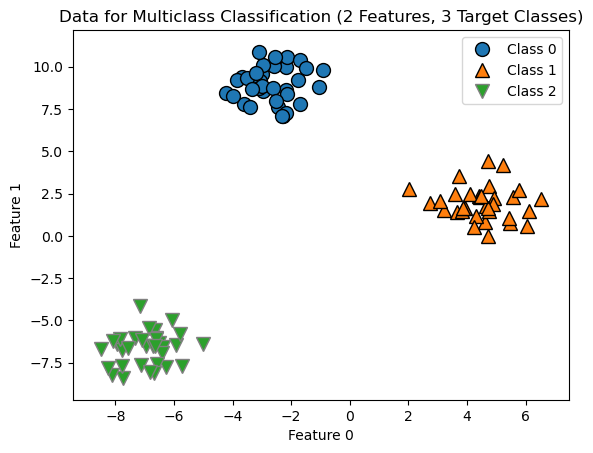

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.title('Data for Multiclass Classification (2 Features, 3 Target Classes)');

When we fit a logistic regression model to this data and then view the coefficients we see that there are actually 3 sets of coefficients created, one for each model in the *one-vs-many* approach described above.

In [61]:
# Fit the logistic regression model
lr = LogisticRegression().fit(X, y)

# View the coefficients
lr.coef_

array([[-0.3852,  0.6291],
       [ 0.7406, -0.1761],
       [-0.3555, -0.453 ]])

The `predict_proba()` method displays the probabilities produced by the model for each of the three target classes. The class prediction will be the class with the highest probability. The target classes are 0, 1, and 2. We see in the first row that the third column has the highest estimated probability. The third column shows the probabilities for the third class (2), so the `predict()` method produces a 2 for the prediction. In the second row the second column has the highest probability, so the model predicts that the second row is class 1, et cetera.

In [62]:
lr.predict_proba(X[:5])

array([[0.    , 0.0002, 0.9998],
       [0.0001, 0.9996, 0.0003],
       [0.9994, 0.0005, 0.0001],
       [0.0001, 0.9998, 0.0001],
       [0.0003, 0.0011, 0.9986]])

In [63]:
lr.predict(X[:5])

array([2, 1, 0, 1, 2])

## Summary 

### Preprocessing for Linear Models

It is recommended to standardize the features with `StandardScaler()` before running linear models, particularly for regularized linear models. Standardizing the features allows the regularization to apply relatively equally to all of the features. If the features aren't standardized they will be on very different ranges, and this affects coefficient magnitude, which, in turn, affects regularization. Features with very large values will have smaller weights and will thus be less affected by the regularization. Features with small values will have larger weights and will thus be more affected by the regularization.

### Strengths and Weaknesses of Linear Models

All of the models we have discussed in this chapter are relatively fast to train and they make their predictions quickly. Because of this they scale well to very large datasets and work well with sparse data. Thus, they are often used on very large datasets when it is not feasible to train other models. They are relatively easy to understand and explain to stakeholders. They also perform well on ***high-dimensional data***, which is data for which the number of features is large compared to the number of instances. High-dimensional datasets are common in fields such as genomics, text mining, and image processing.

It is important to tune the regularization strength parameters `alpha` and `C`. Ridge and lasso use parameter `alpha`, and regularization strength increases (and model flexibility decreases) as `alpha` *increases*. Logistic regression uses parameter `C`. `C` works in the opposite direction: regularization strength increases (and model flexibility decreases) as `alpha` *decreases*.

When building a model with one of these regularized linear models you use L1 regularization if you want to use automatic feature selection to remove some of the features from the model and L2 regularization otherwise. Lasso uses L1 regularization and ridge uses L2 regularization. Logistic regression uses L2 regularization by default but may be configured to use L1 regularization.